# Imports and Data

In [3]:
import pandas as pd
pd.set_option('expand_frame_repr', False)

In [4]:
ERA_SOURCE_DIRECTORY = r"C:\Users\CPL17\OneDrive\Documents\Code\Dev Projects\Current\PAC_New\Data"
STATE = "PA"
source_data = pd.read_excel(ERA_SOURCE_DIRECTORY + f"\ERA_{STATE}.xlsx",sheet_name="All Plants")

# Observe Characteristics of Relevant Columns 

These are the columns used for CNP filters

In [5]:
relevant_columns = ["Scientific Name","Sun Exposure","Soil Moisture","Pollinators","Flowering Months","Height (feet)","Showy","Flower Color"]

In [7]:
relevant_df = source_data[relevant_columns]
relevant_df

,Scientific Name,Sun Exposure,Soil Moisture,Pollinators,Flowering Months,Height (feet),Showy,Flower Color
0,Abies balsamea,"Sun, Part Shade, Shade","Wet, Moist",Larval Host (Butterfly); Larval Host (Moth); Wind,Jun–Aug,60,No,Yellow
1,Acalypha rhomboidea,NaN,"Moist, Dry",Larval Host (Moth),NaN,NaN,Yes,NaN
2,Acalypha virginica,"Sun, Part Shade","Moist, Dry",NaN,Jun–Jul,3,Yes,Red
3,Acer negundo,"Sun, Part Shade, Shade","Wet, Moist","Native Bees; Bombus; Honey Bees; Beetles, Wasp...",Mar–Apr,60,No,White
4,Acer nigrum,"Sun, Part Shade, Shade",Dry,Larval Host (Moth); Wind,May–Jun,100,No,Yellow
...,...,...,...,...,...,...,...,...
1656,Zanthoxylum americanum,NaN,"Moist, Dry","Native Bees; Honey Bees; Beetles, Wasps, Flies...",NaN,NaN,NaN,NaN
1657,Zigadenus elegans,"Sun, Part Shade",Dry,Native Bees,May–Jun,1–3,No,White
1658,Zizania aquatica,"Sun, Part Shade",Wet,Larval Host (Butterfly); Larval Host (Moth); Wind,Indeterminate,10,No,Green
1659,Zizia aptera,"Sun, Part Shade, Shade","Wet, Moist, Dry","Native Bees; Bombus; Honey Bees; Beetles, Wasp...",May–Jun,1–3,Yes,Yellow


In [8]:
relevant_df.set_index("Scientific Name",inplace=True)
relevant_df.to_csv(ERA_SOURCE_DIRECTORY +"/ERA_PA_Reduced.csv")

<AxesSubplot:>

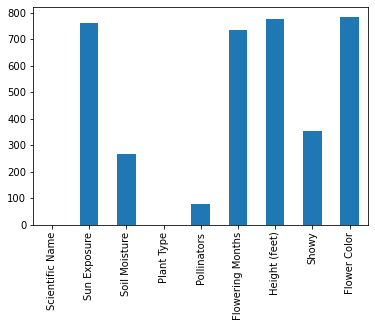

In [7]:
relevant_df.isna().sum().plot(kind="bar")

# Unique Values

In [10]:
relevant_df = pd.read_csv("./ERA_PA_Reduced.csv")[relevant_columns]
relevant_df.drop("Scientific Name",axis=1,inplace=True)

In [13]:
full_df = None
for col in relevant_df:
    df = relevant_df[col].value_counts().reset_index()
    df.columns = [df.columns[1],"Count"]
    if full_df is not None:
        full_df = pd.concat([full_df,df],axis=1)
    else:
        full_df = df

full_df.to_csv("PA_UniqueValues.csv",index=False)

# Down a level a granularity

In [4]:
def get_unique_values(df, column_name):
    unique_values = []
    for cell_value in df[column_name]:
        if isinstance(cell_value,float):
            continue
        if column_name == "Pollinators":
            values = str(cell_value).split(";")
        else:
            values = str(cell_value).split(",")
        for value in values:
            if value not in unique_values:
                unique_values.append(value)
    return unique_values

In [19]:
df = pd.read_csv("PA_UniqueValues.csv",index_col=0)

In [20]:
df.columns

Index(['Sun Exposure', 'Count', 'Soil Moisture', 'Count.1', 'Plant Type',
       'Count.2', 'Pollinators', 'Count.3', 'Flowering Months', 'Count.4',
       'Height (feet)', 'Count.5', 'Showy', 'Count.6', 'Flower Color',
       'Count.7'],
      dtype='object')

In [21]:
_ = {}
for col in df:
    if not col.startswith("Count"):
        _[col] = get_unique_values(df,col)

In [22]:
max_length = 0
for key in _:
    if len(_[key]) > max_length:
        max_length = len(_[key])
for key in _:
    number_of_pads = max_length - len(_[key])
    _[key] += [""]*number_of_pads

In [24]:
df = pd.DataFrame(_)
for col in df:
    df[col] = df[col].apply(lambda x: x.strip().title() if not isinstance(x,float) else x).drop_duplicates()
df.to_csv("PA_UniqueUniqueValues.csv",index=False)

# Compare to CNP Values

Notes: 

* Column names don't change
* The same inconsistencies (leading white space, capitalization) are present in CNP ERA (Data was not cleaned)

In [25]:
source_data = pd.read_excel("../../../Data/Pennsylvania/CNP_PA_Full_10_27.xlsx",sheet_name="ERA_PA")

In [26]:
sorted(source_data.columns)

['Active Growth Period',
 'Article Counts',
 'Article Flag',
 'Article Names',
 'Available Flag',
 'Bats',
 'Beetles, Wasps, Flies',
 'Benefits To Pollinators',
 'Blurb',
 'Bombus',
 'Butterflies',
 'Commercially Available',
 'Common Name',
 'Distribution in USA',
 'Drought Tolerance',
 'Fall Conspicuous',
 'Fertility Requirement',
 'Fire Tolerance',
 'Flower Color',
 'Flowering Months',
 'Growth Form',
 'Growth Rate',
 'Hedge Tolerance',
 'Height (feet)',
 'Honey Bees',
 'Hummingbirds',
 'Larval Host (Butterfly)',
 'Larval Host (Monarch)',
 'Larval Host (Moth)',
 'Larval Species (Lepidoptera)',
 'Leaf Retention',
 'Lifespan',
 'Local Count',
 'Local Flag',
 'Local Names',
 'Moisture Use',
 'Monarchs',
 'Moths',
 'NATIVE',
 'Native Bees (except Bombus)',
 'Native Status',
 'Nesting and Structure (Bees)',
 'Online Counts',
 'Online Flag',
 'Online Names',
 'Palatability (Browsing/Grazing)',
 'Plant Family',
 'Plant Type',
 'Pollinator Value',
 'Pollinators',
 'Propagation',
 'QUIZ_BEE',

In [5]:
relevant_columns = ["Sun Exposure","Soil Moisture","Plant Type","Pollinators","Flowering Months","Height (feet)","Showy","Flower Color"]
relevant_df = source_data[relevant_columns]

full_df = None
for col in relevant_df:
    df = relevant_df[col].value_counts().reset_index()
    df.columns = [df.columns[1],"Count"]
    if full_df is not None:
        full_df = pd.concat([full_df,df],axis=1)
    else:
        full_df = df

_ = {}
for col in full_df:
    if not col.startswith("Count"):
        _[col] = get_unique_values(full_df,col)

max_length = 0
for key in _:
    if len(_[key]) > max_length:
        max_length = len(_[key])
for key in _:
    number_of_pads = max_length - len(_[key])
    _[key] += [""]*number_of_pads

df = pd.DataFrame(_)
for col in df:
    df[col] = df[col].apply(lambda x: x.strip().title() if not isinstance(x,float) else x).drop_duplicates()

df.to_csv("CNP_PA_UniqueUniqueValues.csv",index=False)